# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [3]:
iowa = pd.read_csv(r'C:\Users\crush\OneDrive\Desktop\DS 5030\assignment1\data\iowa.csv')

I will define the most profitable liquor by subtracting the "State Bottle Cost" from the "State Bottle Retail" because profit is revenue minus expenses. In this case, the revenue is how much the bottle is sold for to the consumer (State Bottle Retail) and the expenses is how much the bottle cost to the liquor store (Store Bottle Cost). The profit will be for only one bottle sold.

In [4]:
df = pd.DataFrame(iowa.groupby("Category Name")["State Bottle Retail"].mean())
df["State Bottle Cost"] = iowa.groupby("Category Name")["State Bottle Cost"].mean()
df["Profit"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df = df.sort_values("Profit", ascending=False)  

Text(0.5, 1.0, 'Top 10 Liquors by Profit')

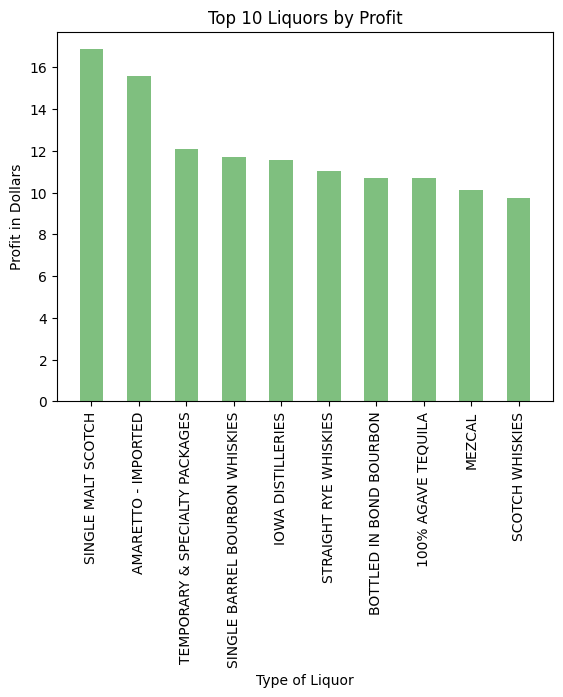

In [5]:
x = df.head(10)

plt.bar(x.index, x["Profit"], color="g", width=0.5, linewidth=3, alpha=0.5, align="center", tick_label=x.index)
plt.xticks(rotation=90)
plt.xlabel("Type of Liquor")
plt.ylabel("Profit in Dollars")
plt.title("Top 10 Liquors by Profit")

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [6]:
x = np.array([1,3,5])
y = np.array([2,5])

Part A: When you try to subtract these two vectors, an error occurs indicating that they could not be broadcast together because they have different shapes.

In [7]:
x - y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Part B: The result is a 3x2 matrix where the first column is x minus the first element in y and the second column is x minus the second element in y.

In [8]:
x.reshape(-1,1) - y.reshape(1, -1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

Part C: Now the resulting matrix is 2x3 and the first ROW is x minus y[0] and the second ROW is x minus y[1]. This is the same matrix as Part B but transposed.

In [9]:
x.reshape(1,-1) - y.reshape(-1, 1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [22]:
# Part D
x_length = len(x)
y_length = len(y)

new_array = np.zeros((x_length, y_length), dtype=int)
for a in range(x_length):
    for b in range(y_length):
        new_array[a, b] = x[a] - y[b]
print(new_array)

new_array_2 = np.zeros((y_length, x_length), dtype=int)
for a in range(y_length):
    for b in range(x_length):
        new_array_2[a, b] = x[b] - y[a]
print(new_array_2)  

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1  1  3]
 [-4 -2  0]]


Part E: x.reshape(-1,1) reshapes the original array x to be 1 column and as many rows needed while x.reshape(1,-1) reshapes the original array to be 1 row and as many columns needed.


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

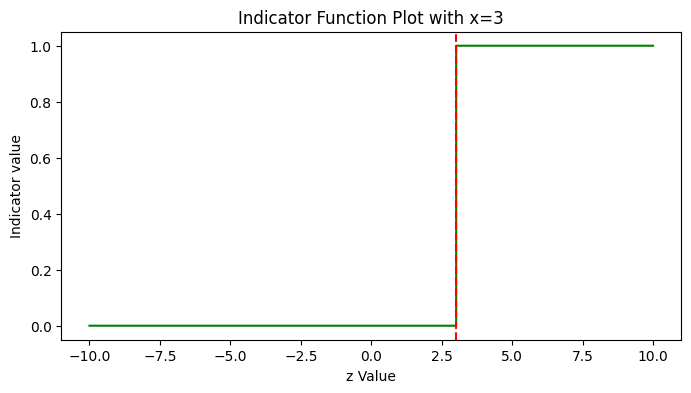

In [ ]:
# Part A

x = 3
z = np.linspace(-10, 10, 1000)
indicator = (x <= z).astype(int) 
plt.figure(figsize=(8,4))
plt.step(z, indicator, where='post', color='g')
plt.axvline(x, linestyle='--', color='r')
plt.title(r'Indicator Function Plot with x=3')
plt.xlabel('z Value')
plt.ylabel('Indicator value')
plt.show()


Part B: For the left side of the equation, per the function, $\mathbb{I}\{ x \le z \}$ is equal to 1. Therefore, $1 - \mathbb{I}\{ x \le z \}$ is zero. For the right side of the equation, $\mathbb{I}\{ x > z \}$ is zero. So, zero equals zero.

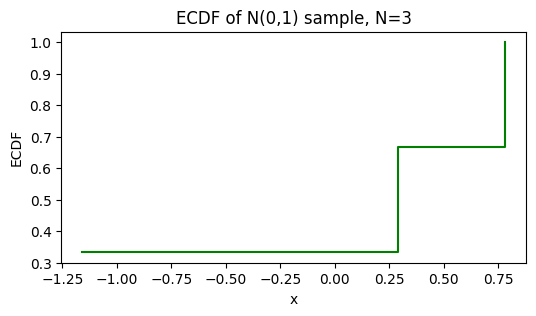

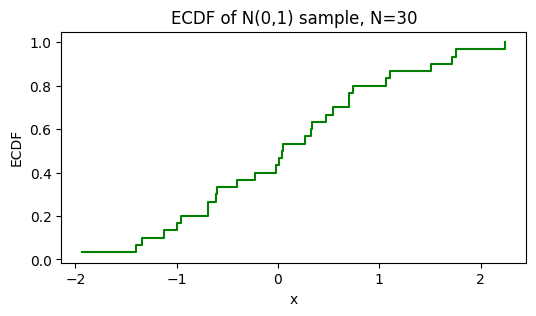

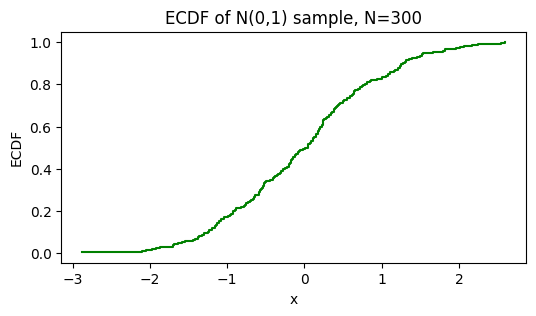

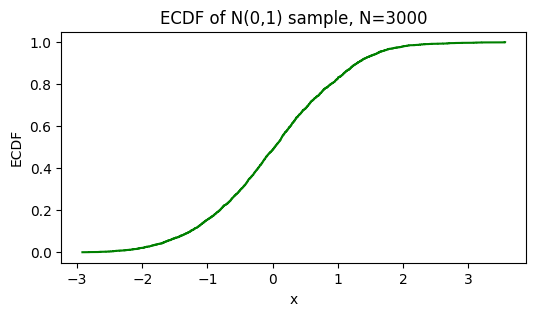

In [ ]:
# Part C

import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)


def ecdf(sample):
    x_sorted = np.sort(sample)
    n = x_sorted.size
    y = np.arange(1, n+1) / n
    return x_sorted, y

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    xs, ys = ecdf(X)

    plt.figure(figsize=(6,3))
    plt.step(xs, ys, where='post', color='g')
    plt.title(f'ECDF of N(0,1) sample, N={N}')
    plt.xlabel('x')
    plt.ylabel('ECDF')
    plt.show()

Part D: As the sample size of N gets larger, the ECDF plot begins to smooth and become more like a curve.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [11]:
# Part A
def quantile(data, q):
        data = sorted(data)
        n = len(data)
        position = q * (n - 1)
        lower = int(position)
        upper = min(lower + 1, n - 1)
        weight = position - lower
        return data[lower] * (1 - weight) + data[upper] * weight

In [12]:
# Part B
def iqr_and_whiskers(data):
        data = sorted(data)
        q3 = quantile(data, 0.75)
        q1 = quantile(data, 0.25)
        iqr = np.round(q3 - q1, 2)
        whisker_range = 1.5 * iqr
        lower = q1 - whisker_range
        upper = q3 + whisker_range
        whiskers = (np.round(lower, 2), np.round(upper, 2))
        return iqr, whiskers

In [13]:
# Part C
def five_number_summary(data):
    data = sorted(data)
    min, max = data[0], data[-1]
    q1, q3 = quantile(data, 0.25), quantile(data, 0.75)
    median = quantile(data, 0.5)
    iqr, whiskers = iqr_and_whiskers(data)
    return min, q1, median, q3, max, whiskers


In [14]:
# Part D
def outliers(data):
    min, q1, median, q3, max, whiskers = five_number_summary(data)
    outliers = [x for x in data if x < whiskers[0] or x > whiskers[1]]
    if len(outliers) == 0:
        return False
    else:
        return True

(-1628.4, 36.550000000000004, 78.66, 152.88, 36720.0, (-137.94, 327.38))
True
count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64


<Axes: xlabel='Sale (Dollars)'>

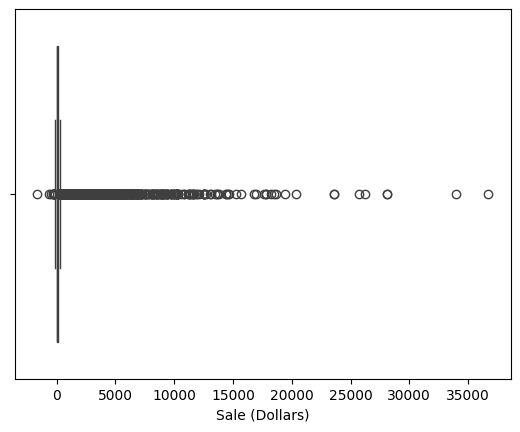

In [15]:
# Part E
print(five_number_summary(iowa["Sale (Dollars)"]))
print(outliers(iowa["Sale (Dollars)"]))


print(iowa["Sale (Dollars)"].describe())
sns.boxplot(x=iowa["Sale (Dollars)"])

My functions work and I know this because there are in fact outliers in this series of data and my five number summary matches the describe function.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?